In [3]:
import pandas as pd
from datasets import load_dataset

c:\Users\frbre\OneDrive\01 Dokumenter\01 Uni\SDS Thesis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# AnnoMI

In [4]:
# Load data
annomi = pd.read_csv("..\data\AnnoMI\AnnoMI-simple.csv")
annomi

,transcript_id,mi_quality,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,main_therapist_behaviour,client_talk_type
0,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,question,NaN
1,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,NaN,neutral
2,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",therapist_input,NaN
3,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,NaN,neutral
4,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,therapist_input,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9694,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,376,therapist,00:26:45,You know maybe they'll walk that road with you...,other,NaN
9695,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,377,client,00:26:49,"Yeah, okay, uh, all right, yeah. All right.",NaN,change
9696,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,378,therapist,00:26:52,There's a couple of people.,other,NaN
9697,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,379,client,00:26:54,Yeah.,NaN,change


In [5]:
annomi['mi_quality'].value_counts(normalize=True)

mi_quality
high    0.911331
low     0.088669
Name: proportion, dtype: float64

In [6]:
timestamp = r'\b(\d{1,2}:[0-5][0-9]:[0-5][0-9])\b'
annomi['utterance_text'] = annomi['utterance_text'].str.replace(r'\[unintelligible ' + timestamp + r'\]', '<UNK>', regex=True)

In [7]:
client = annomi[annomi['interlocutor'] == 'client']
client

,transcript_id,mi_quality,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,main_therapist_behaviour,client_talk_type
1,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,NaN,neutral
3,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,NaN,neutral
5,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,5,client,00:00:39,Usually three drinks and glasses of wine.,NaN,neutral
7,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,7,client,00:00:46,Something like that.,NaN,neutral
9,0,high,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,9,client,00:01:03,Okay.,NaN,neutral
...,...,...,...,...,...,...,...,...,...,...,...
9689,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,371,client,00:26:21,Hmm.,NaN,change
9691,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,373,client,00:26:33,There's Fiona.,NaN,change
9693,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,375,client,00:26:36,"<UNK> getting out so what-what he did. Um, dad...",NaN,change
9695,133,high,Motivational interviewing: Ken interviews Daryl,https://www.youtube.com/watch?v=MOVj0FoOxpk&t=...,reducing recidivism,377,client,00:26:49,"Yeah, okay, uh, all right, yeah. All right.",NaN,change


In [21]:
pd.set_option('display.max_colwidth', None)

print(client['utterance_text'].sample(5))

7347                                                                                                                                                                                                                                                                                                                                                                                                                                     Yeah.
8887                                                                                                                                                                                                                                                             Well, the only thing-- I've never smoked cigarettes ever, um, but, um, when, um, when I go out with my friends, um, we like to go to, you know, we like to go out to lounges.
2317                                                                                                                                      

In [33]:
# Get the minimum length
min_length = client['utterance_text'].str.split().apply(len).min()

# Get the maximum length
max_length = client['utterance_text'].str.split().apply(len).max()

# Get the average length
avg_length = client['utterance_text'].str.split().apply(len).mean()

min_length, max_length, avg_length


(1, 246, 14.965123520863608)

<Axes: >

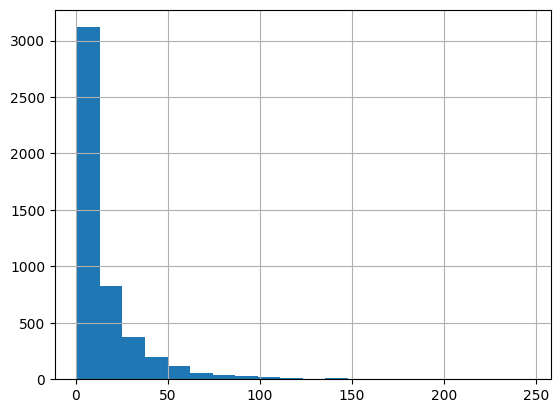

In [34]:
client['utterance_text'].str.split().apply(len).hist(bins=20)

In [35]:
client['utterance_text'].str.split().apply(len).describe()

count    4817.000000
mean       14.965124
std        20.383716
min         1.000000
25%         2.000000
50%         8.000000
75%        20.000000
max       246.000000
Name: utterance_text, dtype: float64

In [39]:
client[(client['utterance_text'].str.split().apply(len) >= 150)].count()

transcript_id               4
mi_quality                  4
video_title                 4
video_url                   4
topic                       4
utterance_id                4
interlocutor                4
timestamp                   4
utterance_text              4
main_therapist_behaviour    0
client_talk_type            4
dtype: int64

# DAIC-WOZ

In [4]:
daic = pd.read_csv(r"D:\PACS\DAIC-WOZ\transcripts_only\300_Transcript.csv")

In [5]:
daic

,Start_Time,End_Time,Text,Confidence
0,14.3,15.1,so I'm going to,0.934210
1,20.3,21.1,interview in Spanish,0.608470
2,23.9,24.3,okay,0.690606
3,62.1,62.7,good,0.951897
4,68.8,69.8,Atlanta Georgia,0.987629
...,...,...,...,...
72,602.4,603.2,then,0.957885
73,618.0,618.8,thank you,0.989859
74,620.2,620.7,bye-bye,0.622634
75,640.3,643.7,a real life person is really looking at me,0.969585


In [6]:
daic = pd.read_csv(r"D:\PACS\DAIC-WOZ\transcripts_only\300_Transcript.csv")
for i in range(301, 719):
    try:
        daic = pd.concat([daic, pd.read_csv(r"D:\PACS\DAIC-WOZ\transcripts_only\%d_Transcript.csv" % i)])
    except:
        print(f"Transcript number {i} not found")
        continue

Transcript number 342 not found
Transcript number 394 not found
Transcript number 398 not found
Transcript number 460 not found
Transcript number 493 not found
Transcript number 494 not found
Transcript number 495 not found
Transcript number 496 not found
Transcript number 497 not found
Transcript number 498 not found
Transcript number 499 not found
Transcript number 500 not found
Transcript number 501 not found
Transcript number 502 not found
Transcript number 503 not found
Transcript number 504 not found
Transcript number 505 not found
Transcript number 506 not found
Transcript number 507 not found
Transcript number 508 not found
Transcript number 509 not found
Transcript number 510 not found
Transcript number 511 not found
Transcript number 512 not found
Transcript number 513 not found
Transcript number 514 not found
Transcript number 515 not found
Transcript number 516 not found
Transcript number 517 not found
Transcript number 518 not found
Transcript number 519 not found
Transcri

In [7]:
daic

,Start_Time,End_Time,Text,Confidence
0,14.3,15.1,so I'm going to,0.934210
1,20.3,21.1,interview in Spanish,0.608470
2,23.9,24.3,okay,0.690606
3,62.1,62.7,good,0.951897
4,68.8,69.8,Atlanta Georgia,0.987629
...,...,...,...,...
60,1171.6,1185.3,what I'm most proud of I can say that that th...,0.927357
61,1186.6,1238.6,I like when my kids now my oldest kid you kno...,0.969410
62,1248.2,1248.9,you're welcome,0.982563
63,1252.8,1253.3,goodbye,0.875275


# PACS labels

In [2]:
pacs = pd.read_excel("../data/PACS_labels.xlsx")
pacs

,Document,Class3
0,1028 LGUT Session 5.docx,2
1,1077 KMCC Session 4.docx,1
2,1097 JKEN Session 3.docx,3
3,1099 RMAL Session .docx,3
4,1102 JBOV Session 3.docx,3
...,...,...
73,811 TSPE Session 5.docx,2
74,813 ATRA Session 5.docx,2
75,822 SPOO Session 6.docx,2
76,999 SHER Session 5.docx,1


In [15]:
pacs['Class3'].value_counts(normalize=True)

Class3
3    0.435897
2    0.307692
1    0.256410
Name: proportion, dtype: float64

In [3]:
pacs.columns

Index(['Document', 'Class3'], dtype='object')

In [5]:
type(pacs['Document'][0])

str

In [8]:
for index, row in pacs.iterrows():
    print(row['Document'])

1028 LGUT Session 5.docx
1077 KMCC Session 4.docx
1097 JKEN Session 3.docx
1099 RMAL Session .docx
1102 JBOV Session 3.docx
1108 RGIV Session 3.docx
1120 RMEG Session 2.docx
1141 Session 4.docx
1184 JEIN Session  .docx
1198 RPIC  Session 3.docx
1204 RLEI Session 4.docx
1228 RGAR Session 5.docx
1236 DGRE Session 5.docx
1237 AMAR Session 4.docx
1239 JHOR Session 4.docx
1255 VHER Session 5.docx
1264 RCIL Session 2.docx
1264 RCIL Session 7.docx
1264.docx
1279 MJAC Session 7.docx
1284 DKOL Session 8.docx
1306 CBON Session 3.docx
1307 EAND Session 4.docx
1316 SBAD Session 5.docx
1321 EGRO Session 6.docx
1339 LOLA Session 4.docx
1342 JKAV Session 5.docx
1345 MMAL Session 4.docx
1351 AHOF Session 4.docx
1353 IBER Session 4.docx
1370 LALS Session 4.docx
1383 JWEI Session 3.docx
1388 SRAD Session 5.docx
1391 JBRO Session 6 X.docx
1392.docx
1395 JVIL Session 5.docx
1415 JBEL Session 4.docx
1428 OART Session 5.docx
1444 TILG Session 4.docx
1464 IROD Session 5.docx
1465 FWON Session 5.docx
1468 DSE

# HF learning

In [11]:
imdb = load_dataset("imdb")

Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 255362.84 examples/s]


In [15]:
imdb['train'][1]

{'text': '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, 

# PACS loading issues

In [1]:
import pandas as pd
from utils.preprocessing.transcript import load_data_with_labels, load_patient_turns

ModuleNotFoundError: No module named 'utils'

In [2]:
data = load_data_with_labels(labels_path="../data/PACS_labels.xlsx", folder_path=r"D:\PACS\PACS_docx")


Loaded 78 documents.


In [3]:
data['label'].value_counts(normalize=True)

label
3    0.366919
2    0.366230
1    0.266850
Name: proportion, dtype: float64

In [4]:
turns = load_patient_turns(r"d:\PACS\PACS_docx\D A1 1299 CSHA Session.docx")

In [5]:
len(turns)

68

In [6]:
len(data)

7255

In [7]:
data

,text,label
0,how are you?,2
1,I’m good.,2
2,"(smile, takes a drink of water)",2
3,okay. Thing’s have been a little intense over...,2
4,"yeah (laugh). It’s the, it’s +the same stuff.",2
...,...,...
7250,"now, I wanted to ask you, cos this is my fift...",1
7251,/ ?oh really,1
7252,well that’s good to hear - - do you do you ha...,1
7253,I would say often is the case I mean sometime...,1


In [2]:
test = pd.read_csv(r"C:\Users\frbre\Desktop\train_data.csv")
test

,text,label
0,how are you?,2
1,I’m good.,2
2,"(smile, takes a drink of water)",2
3,okay. Thing’s have been a little intense over...,2
4,"yeah (laugh). It’s the, it’s +the same stuff.",2
...,...,...
5203,oh yeah - - /??(all the years?) ‘I don’t want...,1
5204,ehh - - I was actually surprised to hear it b...,1
5205,you think it’s powerful? (chuckles),1
5206,hmmm,1
